##**📊 Normal Visualizations**

Below are the static visualizations using Matplotlib and Seaborn.


In [21]:
import pandas as pd

file_path = "netflix_content_2023.csv"
df = pd.read_csv(file_path)

print(df.head())

                                 Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

   Hours Viewed Language Indicator Content Type  
0  81,21,00,000            English         Show  
1  66,51,00,000            English         Show  
2  62,28,00,000             Korean         Show  
3  50,77,00,000            English         Show  
4  50,30,00,000            English        Movie  


In [22]:
df["Hours Viewed"] = df["Hours Viewed"].str.replace(",", "").astype(float)

df["Release Date"] = pd.to_datetime(df["Release Date"], errors = "coerce")
df["Release Year"] = df["Release Date"].dt.year

print(df.head())

                                 Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

   Hours Viewed Language Indicator Content Type  Release Year  
0   812100000.0            English         Show        2023.0  
1   665100000.0            English         Show        2023.0  
2   622800000.0             Korean         Show        2022.0  
3   507700000.0            English         Show        2022.0  
4   503000000.0            English        Movie        2023.0  


<ipython-input-23-e9a2a564bf3c>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 53433 (\N{HANGUL SYLLABLE KING}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s

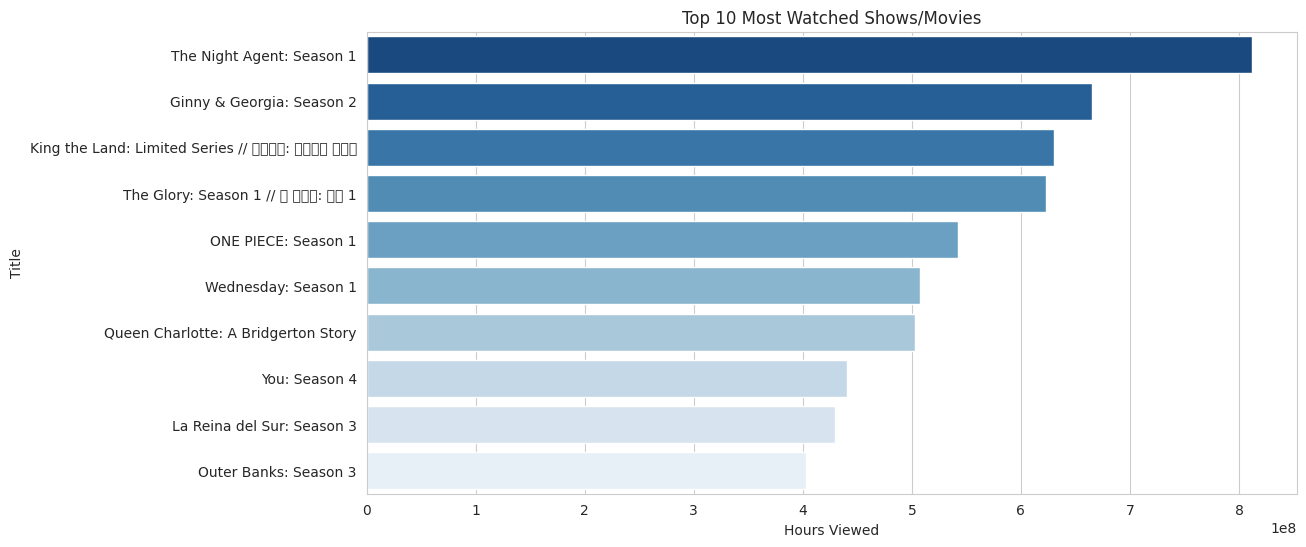

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#top 10 most watched shows/movies
top_10 = df.nlargest(10, "Hours Viewed")
plt.figure(figsize = (12,6))
sns.barplot(x="Hours Viewed", y ="Title", data = top_10, palette = "Blues_r")
plt.xlabel("Hours Viewed")
plt.ylabel("Title")
plt.title("Top 10 Most Watched Shows/Movies")
plt.show()

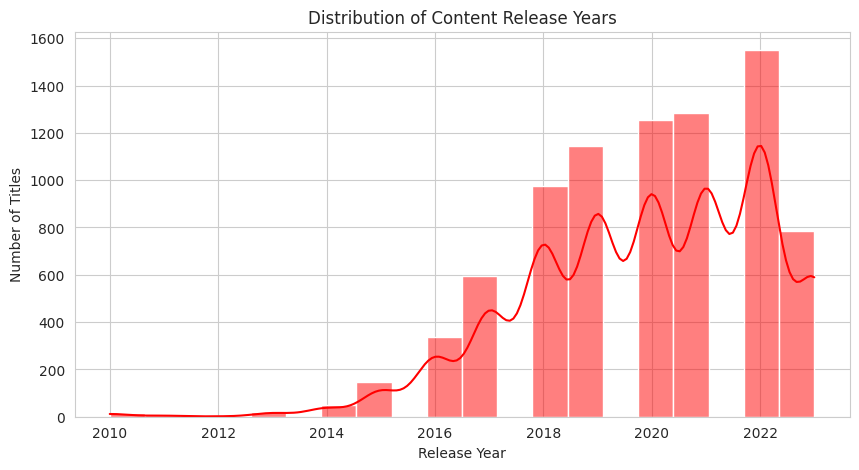

In [24]:
#content release years
plt.figure(figsize = (10,5))
sns.histplot(df["Release Year"].dropna(),bins=20,kde = True, color="red")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Distribution of Content Release Years")
plt.show()

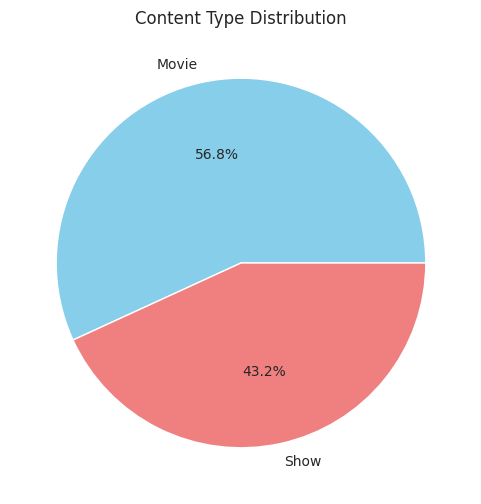

In [25]:
#content type
plt.figure(figsize=(6,6))
df["Content Type"].value_counts().plot.pie(autopct = "%1.1f%%",colors = ["skyblue","lightcoral"])
plt.title("Content Type Distribution")
plt.ylabel("")  # Hide the default y-label
plt.show()

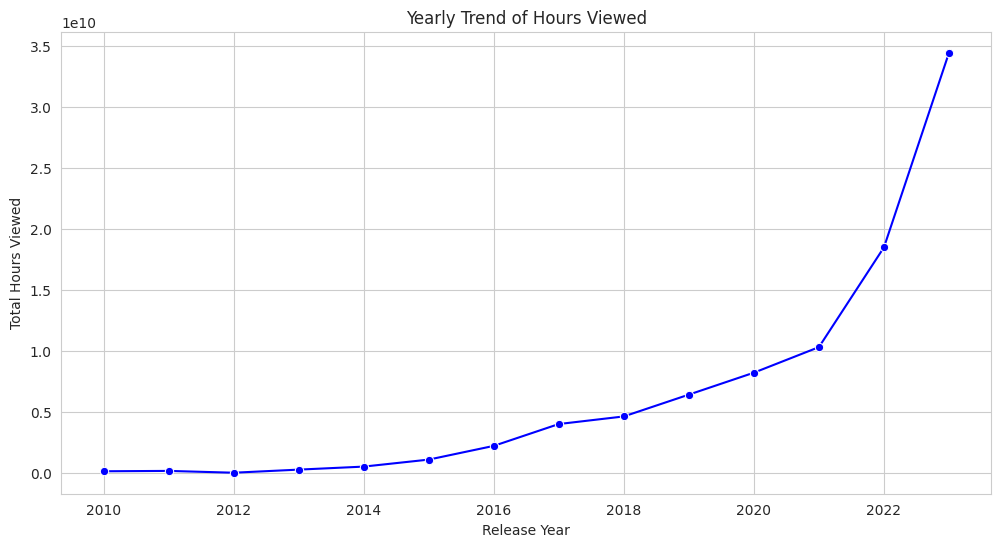

In [26]:
yearly_trend = df.groupby("Release Year")["Hours Viewed"].sum().reset_index()

yearly_trend = yearly_trend.sort_values("Release Year")

plt.figure(figsize = (12,6))
sns.lineplot(x="Release Year", y="Hours Viewed", data = yearly_trend,marker ="o", color = "blue")
plt.xlabel("Release Year")
plt.ylabel("Total Hours Viewed")
plt.title("Yearly Trend of Hours Viewed")
plt.grid(True)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps2zeuc6g/izi86d58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps2zeuc6g/724hs8fr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67272', 'data', 'file=/tmp/tmps2zeuc6g/izi86d58.json', 'init=/tmp/tmps2zeuc6g/724hs8fr.json', 'output', 'file=/tmp/tmps2zeuc6g/prophet_modelltklupeb/prophet_model-20250302103900.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:39:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:

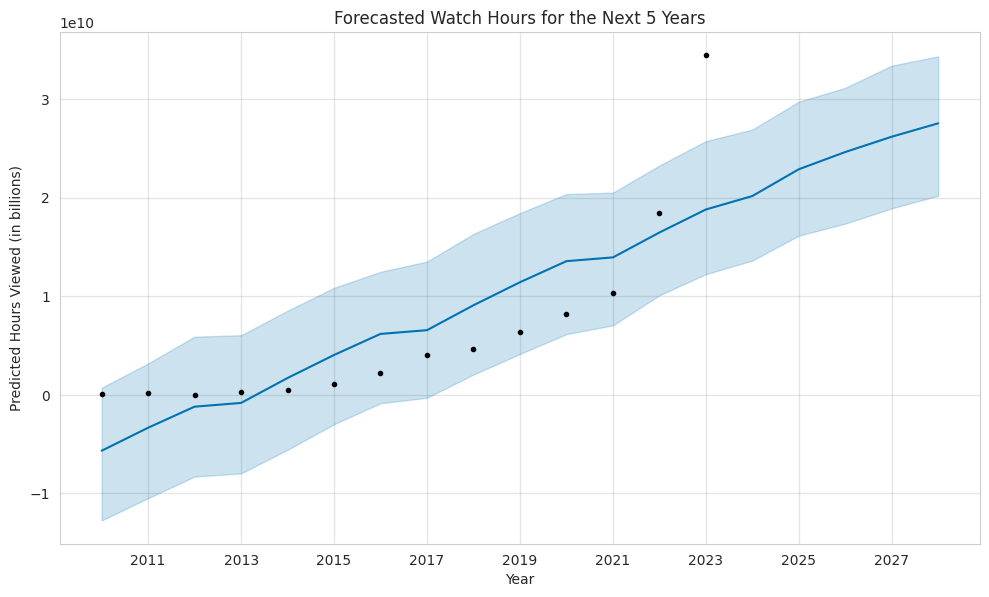

In [27]:
from prophet import Prophet

# Ensure 'ds' column is in datetime format
forecast_df["ds"] = pd.to_datetime(forecast_df["ds"], format="%Y")

# Initialize and fit the model
model = Prophet()
model.fit(forecast_df)

# Create future dates (next 5 years)
future = model.make_future_dataframe(periods=5, freq="Y")

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Forecasted Watch Hours for the Next 5 Years")
plt.xlabel("Year")
plt.ylabel("Predicted Hours Viewed (in billions)")
plt.show()

##**🖥️ Interactive Visualizations**

Below are the interactive visualizations using Plotly.


In [28]:
import plotly.express as px

fig = px.line(forecast, x="ds", y="yhat", title="Forecasted Watch Hours for the Next 5 Years")
fig.add_scatter(x=forecast_df["ds"], y=forecast_df["y"], mode="markers", name="Actual Data")
fig.show()

In [29]:
# Top 10 most-watched content
top_10 = df.nlargest(10, "Hours Viewed")

import plotly.express as px

fig = px.bar(top_10, x="Hours Viewed", y="Title", orientation="h",
             title="Top 10 Most Watched Netflix Shows/Movies (Interactive)",
             labels={"Hours Viewed": "Total Watch Hours", "Title": "Show/Movie"},
             template="plotly_dark", color="Hours Viewed", color_continuous_scale="Blues")

fig.show()


In [30]:
fig = px.pie(df, names="Content Type", title="Netflix Content Type Distribution",
             template="plotly_dark", hole=0.3)

fig.show()


In [31]:
# Group by release year
yearly_count = df.groupby("Release Year").size().reset_index(name="Count")

fig = px.line(yearly_count, x="Release Year", y="Count",
              title="Netflix Content Released Over Time",
              labels={"Release Year": "Year", "Count": "Number of Titles"},
              template="plotly_dark")

fig.show()
